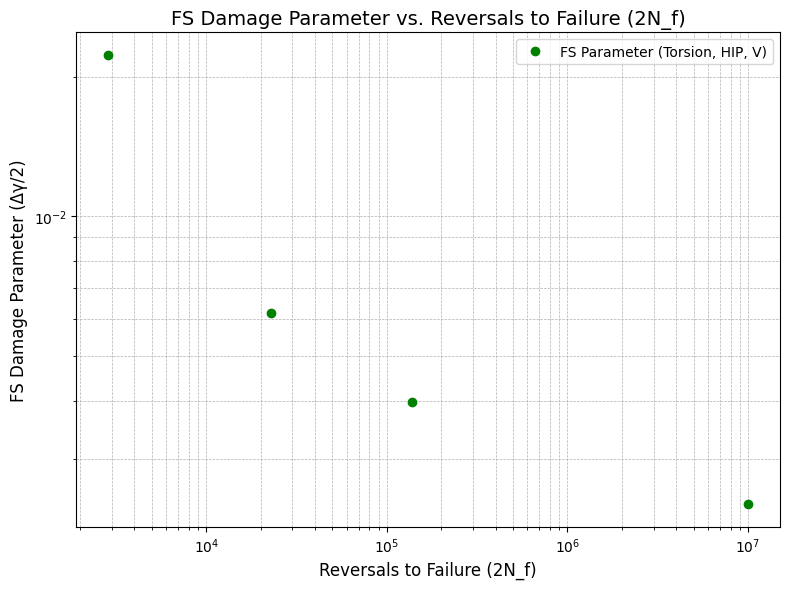

Reversals to failure (2N_f): 5744, FS Parameter (Δγ/2): 0.02231
Reversals to failure (2N_f): 45372, FS Parameter (Δγ/2): 0.00619
Reversals to failure (2N_f): 274724, FS Parameter (Δγ/2): 0.00397
Reversals to failure (2N_f): 20000000, FS Parameter (Δγ/2): 0.00239


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Given data from the table (Surface Δγ/2 (%) and reversals to failure)
delta_gamma_over_2 = np.array([0.934, 0.259, 0.166, 0.1])  # in percentage (%)
Nf = np.array([2872, 22686, 137362, 10000000])  # Reversals to failure

# Convert Δγ/2 from percentage to decimal
delta_gamma_over_2 = delta_gamma_over_2 / 100

# Given material properties
sigma_n_max = 487  # Example maximum normal stress, replace with real value
sigma_y = 526  # Yield strength in MPa (from the table)
k = 1.5  # Material-dependent parameter

# Calculate FS parameter using the left-hand side of the equation
def fs_parameter(delta_gamma_over_2, sigma_n_max, sigma_y, k):
    # FS parameter calculation
    fs_value = delta_gamma_over_2 * (1 + k * sigma_n_max / sigma_y)
    return fs_value

# Calculate FS parameter for each Nf
fs_parameters = fs_parameter(delta_gamma_over_2, sigma_n_max, sigma_y, k)

# Plot the FS parameter vs. Reversals to Failure (2N_f)
plt.figure(figsize=(8, 6))
plt.loglog(Nf, fs_parameters, 'go', label='FS Parameter (Torsion, HIP, V)')

# Add labels and title
plt.title('FS Damage Parameter vs. Reversals to Failure (2N_f)', fontsize=14)
plt.xlabel('Reversals to Failure (2N_f)', fontsize=12)
plt.ylabel('FS Damage Parameter (Δγ/2)', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

# Print the FS parameter results
for i, N in enumerate(Nf):
    print(f"Reversals to failure (2N_f): {2*N:.0f}, FS Parameter (Δγ/2): {fs_parameters[i]:.5f}")


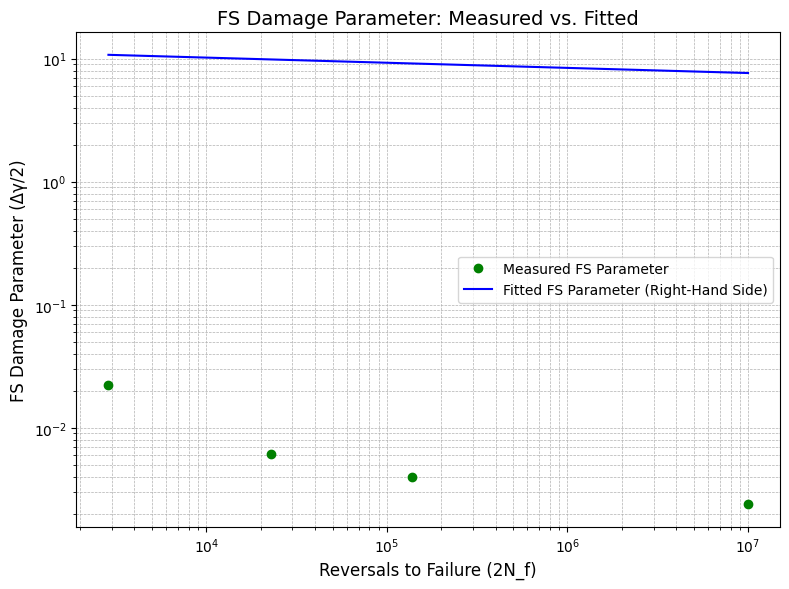

In [64]:
from scipy.optimize import curve_fit

# Material properties for the right-hand side calculation
tau_f_prime = 683  # Shear fatigue strength coefficient (τ'_f) in MPa
gamma_f_prime = 0.40  # Shear fatigue ductility coefficient (γ'_f)
b_0 = -0.0417  # Shear fatigue strength exponent
#b_0 = 2
c_0 = -0.481  # Shear fatigue ductility exponent
G = 45.7  # Shear modulus in MPa

def fs_fitting_function(N, tau_f_prime, G, gamma_f_prime, b_0, c_0):
    elastic_term = (tau_f_prime / G) * (N ** b_0)  # Elastic component
    plastic_term = gamma_f_prime * (N ** c_0)      # Plastic component
    return elastic_term + plastic_term

Nf_fit = np.logspace(np.log10(min(Nf)), np.log10(max(Nf)), 200)
# Generate data for plotting the fitted curve
fs_fitted = fs_fitting_function(Nf_fit, tau_f_prime, G, gamma_f_prime, b_0, c_0)

# Plotting the measured FS parameter vs. Reversals to Failure (2N_f)
plt.figure(figsize=(8, 6))
plt.loglog(Nf, fs_parameters, 'go', label='Measured FS Parameter')

# Plotting the fitted FS parameter (from the right-hand side)
plt.loglog(Nf_fit, fs_fitted, 'b-', label='Fitted FS Parameter (Right-Hand Side)')

# Add labels and title
plt.title('FS Damage Parameter: Measured vs. Fitted', fontsize=14)
plt.xlabel('Reversals to Failure (2N_f)', fontsize=12)
plt.ylabel('FS Damage Parameter (Δγ/2)', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


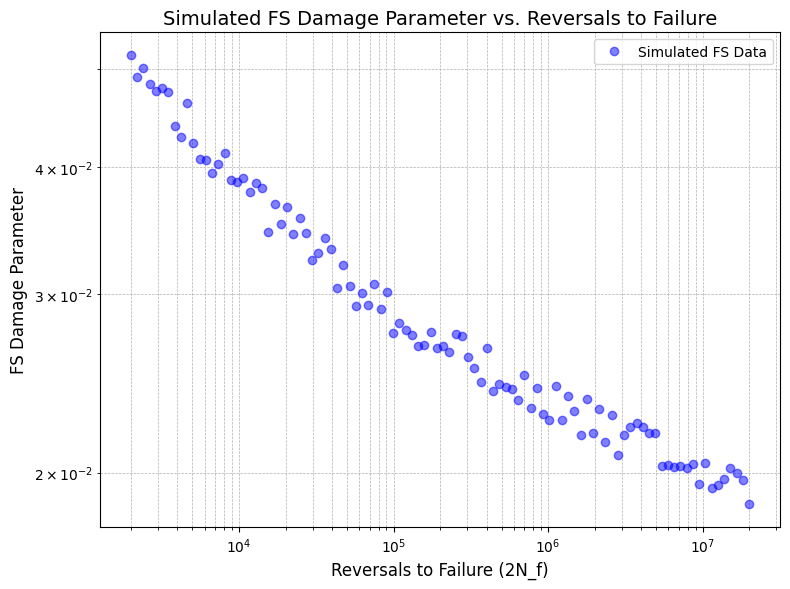

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation (aligned with observed trends in fatigue data)
tau_f_prime = 1390  # Shear fatigue strength coefficient (τ'_f) in MPa
gamma_f_prime = 0.40  # Shear fatigue ductility coefficient (γ'_f)
b_0 = -0.055  # Adjusted Shear fatigue strength exponent (for decaying trend)
c_0 = -0.45  # Adjusted Shear fatigue ductility exponent (for decaying trend)
G = 45.7e3  # Shear modulus in MPa
sigma_n_max = 200  # Maximum normal stress in MPa
sigma_y = 526  # Yield strength in MPa
k = 1.5  # Material-dependent parameter for FS

# Generate simulated reversals to failure (log-distribution to simulate realistic fatigue life data)
Nf = np.logspace(3, 7, num=100)  # Simulating between 10^3 and 10^7 reversals to failure

# Simulating defect distribution (random voids, etc.)
defect_factor = np.random.uniform(0.95, 1.05, size=Nf.shape)  # Random defect multiplier (small variation)

# FS parameter calculation function (elastic + plastic strain components)
def fs_parameter_simulation(N, tau_f_prime, G, gamma_f_prime, b_0, c_0, sigma_n_max, sigma_y, k, defect_factor):
    elastic_term = (tau_f_prime / G) * (2 * N) ** b_0
    plastic_term = gamma_f_prime * (2 * N) ** c_0
    fs_value = (elastic_term + plastic_term) * (1 + k * sigma_n_max / sigma_y) * defect_factor
    return fs_value

# Calculate the simulated FS parameters
fs_parameters_simulated = fs_parameter_simulation(Nf, tau_f_prime, G, gamma_f_prime, b_0, c_0, sigma_n_max, sigma_y, k, defect_factor)

# Plot the simulated FS parameters vs. reversals to failure (2N_f)
plt.figure(figsize=(8, 6))
plt.loglog(2 * Nf, fs_parameters_simulated, 'bo', alpha=0.5, label='Simulated FS Data')

# Add labels and title
plt.title('Simulated FS Damage Parameter vs. Reversals to Failure', fontsize=14)
plt.xlabel('Reversals to Failure (2N_f)', fontsize=12)
plt.ylabel('FS Damage Parameter', fontsize=12)
plt.grid(True, which="both", ls="--", lw=0.5)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [50]:
(tau_f_prime / G) * (Nf ** b_0)

array([10.72255327,  9.83715236,  9.12547472,  7.63140502])

In [48]:
gamma_f_prime * (Nf ** c_0)

array([0.00868307, 0.00321322, 0.00135128, 0.00017181])